In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\deven\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , Input


In [37]:
#To ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if(len(physical_devices) > 0):
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print("GPU is available")
else:
  print("GPU is not available")

GPU is not available


In [38]:
#Load anda explore the dataset
train_dir = r'Dataset\the_wildfire_dataset_2n_version\train'
val_dir = r'Dataset\the_wildfire_dataset_2n_version\val'
test_dir = r'Dataset\the_wildfire_dataset_2n_version\test'


In [39]:
def resize_large_images(directory, max_pixels=89478485, target_size=(150,150)):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('jpg', 'jpeg', 'png')):
                path = os.path.join(root, file)
                try:
                    with Image.open(path) as img:
                        if img.size[0] * img.size[1] > max_pixels:
                            print(f"Resizing: {path}")
                            img = img.resize(target_size)
                            img.save(path)
                except Exception as e:
                    print(f"Failed to open {path}: {e}")

In [40]:

resize_large_images(train_dir)
resize_large_images(val_dir)
resize_large_images(test_dir)

Failed to open Dataset\the_wildfire_dataset_2n_version\train\fire\11713547914_dd11630b77_o.jpg: name 'Image' is not defined
Failed to open Dataset\the_wildfire_dataset_2n_version\train\fire\11826515394_7959916eff_o.jpg: name 'Image' is not defined
Failed to open Dataset\the_wildfire_dataset_2n_version\train\fire\11875858055_b291d73a36_o.jpg: name 'Image' is not defined
Failed to open Dataset\the_wildfire_dataset_2n_version\train\fire\11876298944_d12f714d39_o.jpg: name 'Image' is not defined
Failed to open Dataset\the_wildfire_dataset_2n_version\train\fire\11876299854_f22f787159_o.jpg: name 'Image' is not defined
Failed to open Dataset\the_wildfire_dataset_2n_version\train\fire\18983401442_9023bb668c_o.jpg: name 'Image' is not defined
Failed to open Dataset\the_wildfire_dataset_2n_version\train\fire\19197957859_cb989ed680_o.jpg: name 'Image' is not defined
Failed to open Dataset\the_wildfire_dataset_2n_version\train\fire\20419875863_40d4dbbea0_o.jpg: name 'Image' is not defined
Failed t

In [41]:
#List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

#Display the class name
print(f'Number of classes: {num_classes}')
print(f'Classes: {classes}')

Number of classes: 2
Classes: ['fire', 'nofire']


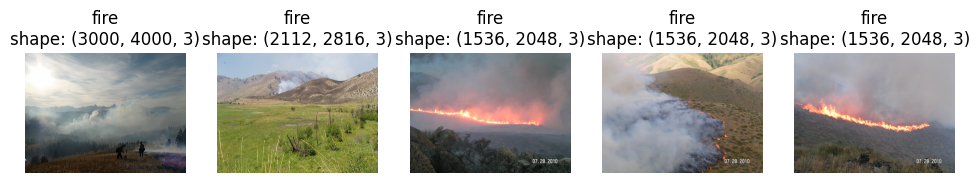

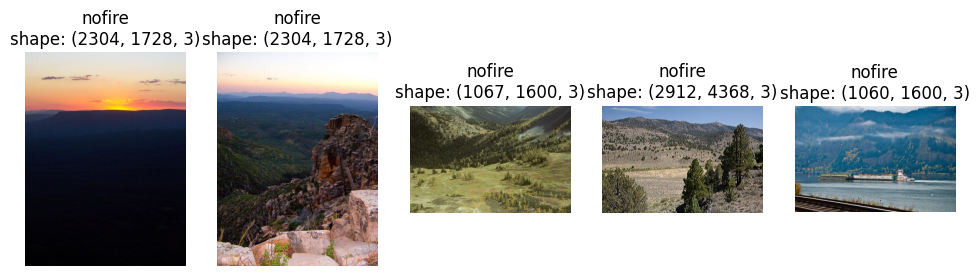

In [42]:
def visualize_images(class_index):
    plt.figure(figsize=(12,10))
    class_path = os.path.join(train_dir, classes[class_index])
    for i in range(5):
        img_name = os.listdir(class_path)[i]
        img_path = os.path.join(class_path, img_name)
        img = plt.imread(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f'{classes[class_index]}\nshape: {img.shape}')
        plt.axis('off')
    plt.show()

visualize_images(0)
visualize_images(1)

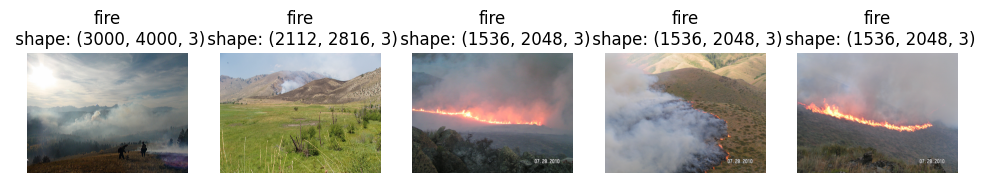

In [43]:
#Let's visulalize the imgage in the dataset
plt.figure(figsize=(12,10))
# i=0
for i in range(5):
  class_path= os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]}\n shape: {img.shape}')
  plt.axis('off')
plt.show()

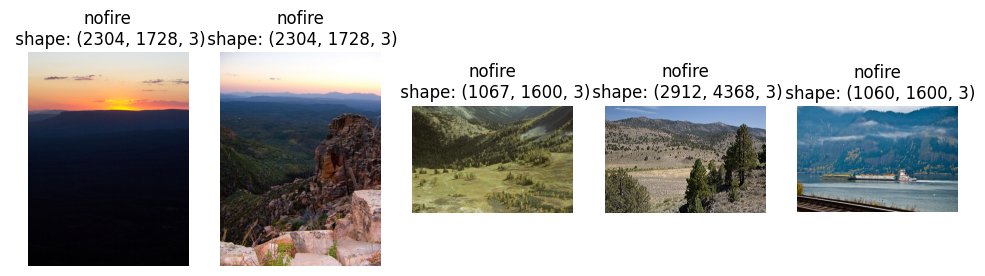

In [44]:
#Let's visulalize the imgage in the dataset
plt.figure(figsize=(12,10))
# i=0
for i in range(5):
  class_path= os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]}\n shape: {img.shape}')
  plt.axis('off')
plt.show()


In [45]:
#Preprocesssing
#image dimensions and batch size
img_width , img_height = 150,150
batch_size = 32

#Data Generators

train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2],
    rescale=1./255
    )
val_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2],
    rescale=1./255
)
test_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2],
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [46]:
#mapping the indices
class_mapping = train_generator.class_indices
# print(class_mapping)

#Extract the class
class_name = list(class_mapping.keys())
print(class_name)

['fire', 'nofire']


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the MobileNetV2 model without the top layer
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification (fire or no fire)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Image data generators (Replace 'path_to_train' and 'path_to_val' with actual directories)
# train_dir = ''
# val_dir = 'path_to_val'

# train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2,
                                #    horizontal_flip=True)
# val_datagen = ImageDataGenerator(rescale=1./255)
# 
# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     target_size=(150, 150),
#                                                     batch_size=32,
                                                    # class_mode='binary')

# val_generator = val_datagen.flow_from_directory(val_dir,
#                                                 target_size=(150, 150),
#                                                 batch_size=32,
#                                                 class_mode='binary')

# Train the model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=5)

# Optional: Fine-tune some layers
# Unfreeze top layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Continue training (fine-tuning)
model.fit(train_generator,
          validation_data=val_generator,
          epochs=5)

# Save the trained model
model.save("fire_detection_model2.h5")


C:\Users\deven\AppData\Local\Temp\ipykernel_5480\1579041139.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 210s/step - accuracy: 0.7137 - loss: 0.5759  

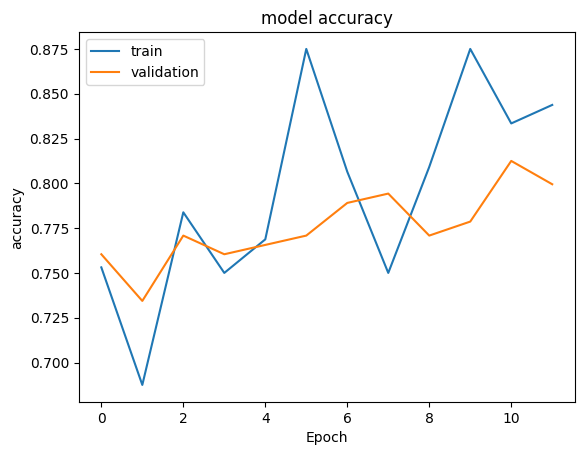

In [ ]:
#Evaluating the model - plotting training and validation acc

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

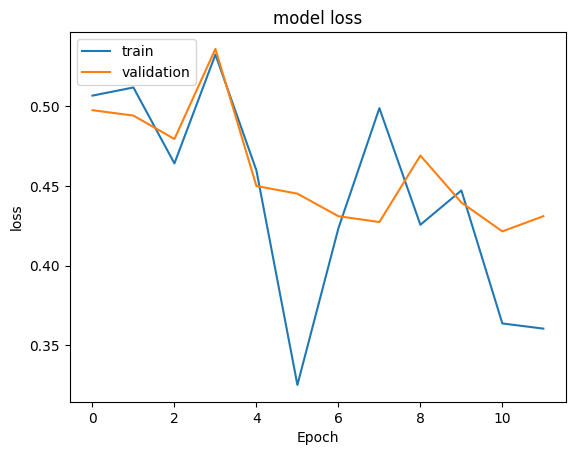

In [ ]:
#Evaluating the model - plotting training and validation loc

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
model.evaluate(val_generator)
model.save("forest_fire_cnn_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 9/12 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.8351 - loss: 0.3952

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/12 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.8344 - loss: 0.3949

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - accuracy: 0.8361 - loss: 0.3923
Test accuracy:  0.8438


In [ ]:
#save the model
model.save('ForestFireDetection.keras')
model.save('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/ForestFireDetection.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('ForestFireDetection.keras')


def predict_fire(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        predicted_class = class_name[1]
    else:
        predicted_class = class_name[0]
    plt.imshow(img)
    plt.title(f'Predicted : {predicted_class}')
    plt.axis('off')
    plt.show()

In [ ]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')


['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


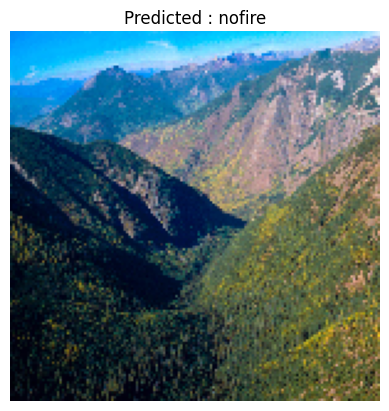

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/23289748533_1a14a0f249_o.jpg')